## Spaceship Titanic

**Coder**: Chanelle McLeod

**Goal**: Predict which passengers are transported to an alternate dimension.

**Source**: kaggle (https://www.kaggle.com/competitions/spaceship-titanic)


#### Story

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.


The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimeonns



To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.


#### Variables
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- 
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence
- 
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabin
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- *Transported* - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [1]:
# Things to consider:
# Extract the group from passenger ID
# Encode the HomePlanet
# Encode CryoSleep
# Separate Cabin and encode Side (Port/Starboard)
# Encode Destination
# Group age into buckets
# Encode VIP
# Create total spend column

### Load data

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
spaceship_titanic_train = pd.read_csv(r"C:\Users\owner\MC1 Labs\Lab data\train_spaceship_titanic.csv")

spaceship_titanic_use = spaceship_titanic_train.copy()

## 1. Explore dataset

In [3]:
spaceship_titanic_use.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
spaceship_titanic_use.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [5]:
spaceship_titanic_use.shape

(8693, 14)

In [6]:
spaceship_titanic_use.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
spaceship_titanic_use.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
spaceship_titanic_use.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
spaceship_titanic_use['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [10]:
# Many unique cabins, could investigate Port and Starboard
spaceship_titanic_use['Cabin'].nunique()

6560

In [11]:
# As stated in the description, there are three destinations people are headed to
spaceship_titanic_use['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

<Axes: xlabel='Age', ylabel='Count'>

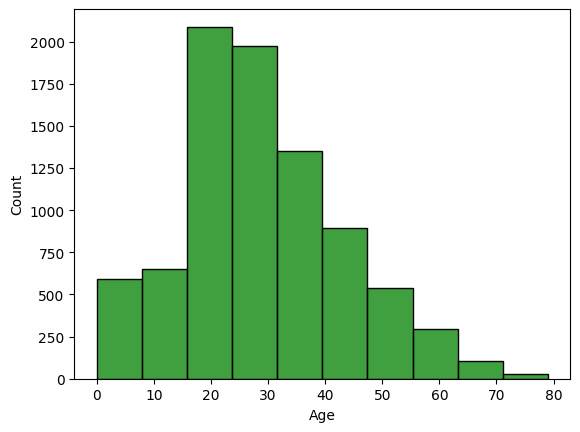

In [12]:
# Data is right skewed, the mean will be pulled higher, no outliers found
sns.histplot(spaceship_titanic_use['Age'], bins = 10, color = 'g')

In [13]:
# 66% of individuals from Europa were transported, those without VIP access had a higher chance of transporting (67%)
spaceship_titanic_use.pivot_table(index='HomePlanet', columns='VIP', values='Transported', aggfunc='mean',
                    margins=True)

VIP,False,True,All
HomePlanet,,,
Earth,0.424337,NaN,0.424337
Europa,0.670072,0.488550,0.658688
Mars,0.534180,0.158730,0.520396
All,0.506174,0.381443,0.503256


In [14]:
# 61% of individuals travelling to `55 Cancri e` were transported, those without VIP access had a higher chance of transporting (61%)
spaceship_titanic_use.pivot_table(index='Destination', columns='VIP', values='Transported', aggfunc='mean',
                    margins=True)

VIP,False,True,All
Destination,,,
55 Cancri e,0.618203,0.415385,0.610700
PSO J318.5-22,0.506614,0.388889,0.503876
TRAPPIST-1e,0.472737,0.368421,0.470680
All,0.506223,0.385787,0.503369


## 2. Data Preparation
- I need to first handle missing values
- I need to separate out passengerID and cabin
- I could create a total column with the amount spent
- I could bucket ages into groups
- I need to encode homeplanet, cryosleep, destination and transported columns
- I'll need to also set the proper data types

### Handling missing values
Since there are so many records in this training dataset, I could just remove rows with missing values. However, I will attempt to impute some of them.


<Axes: >

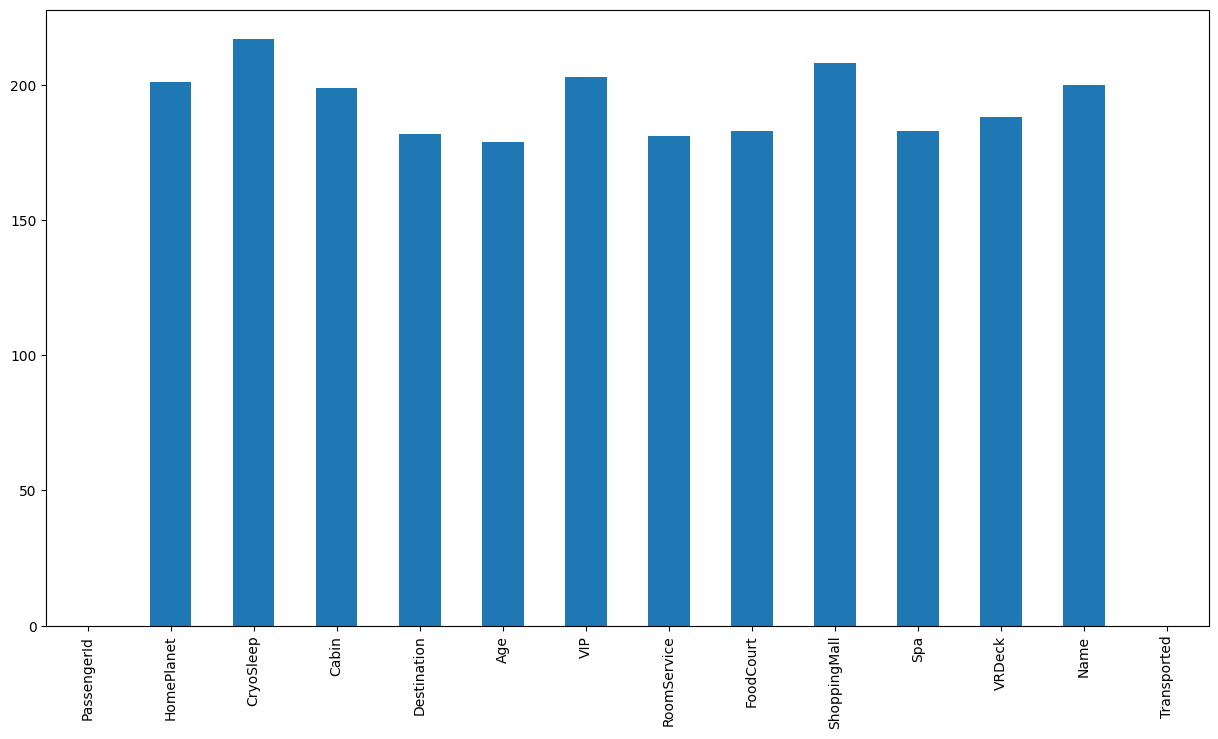

In [15]:
spaceship_titanic_use.isnull().sum().plot.bar(figsize = (15, 8))

### Fill missing names with John Doe

In [16]:
# Missing values - Name: convert all missing names to John Doe
spaceship_titanic_transformed = spaceship_titanic_use.fillna({'Name':'John Doe'})
spaceship_titanic_transformed[spaceship_titanic_transformed['Name'] == 'John Doe'] # 200 rows filled

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,John Doe,False
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,John Doe,True
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,John Doe,True
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,John Doe,True
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,John Doe,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,John Doe,True
8631,9208_01,Earth,True,G/1485/S,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,John Doe,True
8636,9218_01,Europa,True,B/353/S,55 Cancri e,43.0,False,0.0,0.0,0.0,0.0,0.0,John Doe,True
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,2868.0,971.0,John Doe,True


In [17]:
spaceship_titanic_transformed['Name'].isna().sum()

0

### Impute Age

In [18]:
# Since age is a number, imput it using MICE
from fancyimpute import IterativeImputer as MICE

age_imputed = MICE().fit_transform(spaceship_titanic_transformed[["Age"]])
age_imputed

array([[39.],
       [24.],
       [58.],
       ...,
       [26.],
       [32.],
       [44.]])

In [19]:
spaceship_titanic_transformed.loc[:, ["Age"]] = age_imputed
spaceship_titanic_transformed['Age'].isna().sum()

0

In [20]:
# I'm curious what these rows returned for their new age
spaceship_titanic_use[spaceship_titanic_use['Age'].isnull()].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True


In [21]:
# It seems the imputer just did the median age... ok

spaceship_titanic_transformed.iloc[[50, 64, 137, 181, 184, 8274]]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,28.82793,False,4.0,0.0,2.0,4683.0,0.0,Elaney Hubbarton,False
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,28.82793,False,793.0,0.0,2.0,253.0,0.0,Cinst Binie,False
137,0149_01,Earth,True,G/27/S,55 Cancri e,28.82793,False,0.0,0.0,0.0,0.0,0.0,Billya Hubbarrison,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,28.82793,False,0.0,2433.0,NaN,878.0,443.0,Vegas Embleng,True
184,0206_01,Europa,False,C/9/S,55 Cancri e,28.82793,False,2.0,1720.0,12.0,1125.0,122.0,Nuson Brugashed,True
8274,8835_01,Earth,True,G/1425/S,TRAPPIST-1e,28.82793,False,0.0,0.0,0.0,0.0,0.0,Shalle Bartines,False


### Separate Group and number from PassengerID

In [22]:
# Separate out group from PassengerID
spaceship_titanic_transformed[['Group', 'GroupNumber']] = spaceship_titanic_transformed['PassengerId'].str.split('_', expand = True)
spaceship_titanic_transformed

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupNumber
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,01
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,01
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,01
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,01


In [23]:
# It's a lot of unique groups (family groups, etc.) not sure how valuable this will be in the model
spaceship_titanic_transformed['Group'].nunique()

6217

In [24]:
# There's a maximum of 8 people in a single group; these are strings
spaceship_titanic_transformed['GroupNumber'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [26]:
spaceship_titanic_transformed[['Group', 'GroupNumber']] = spaceship_titanic_transformed[['Group', 'GroupNumber']].astype('int32')
spaceship_titanic_transformed.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
Group             int32
GroupNumber       int32
dtype: object

### Separate Cabin into Deck, Num and Side

In [27]:
# Separate out deck, num and side from Cabin
spaceship_titanic_transformed[['Deck', 'Num', 'Side']] = spaceship_titanic_transformed['Cabin'].str.split("/", expand = True)
spaceship_titanic_transformed.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupNumber,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S


In [28]:
# Deck and Side could be useful in the model

In [29]:
spaceship_titanic_transformed['Deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

In [30]:
spaceship_titanic_transformed['Num'].nunique()

1817

In [31]:
spaceship_titanic_transformed['Side'].unique()

array(['P', 'S', nan], dtype=object)

### Create a total spent column

In [32]:
spaceship_titanic_transformed['total_spent'] = spaceship_titanic_transformed['RoomService'] + spaceship_titanic_transformed['FoodCourt'] + spaceship_titanic_transformed['ShoppingMall'] + spaceship_titanic_transformed['Spa'] + spaceship_titanic_transformed['VRDeck']

spaceship_titanic_transformed.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupNumber,Deck,Num,Side,total_spent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S,1091.0


### Bucket Age into Groups

In [34]:
# Bucket age into groups
spaceship_titanic_transformed['age_groups'] = pd.cut(spaceship_titanic_transformed['Age'], bins = [0, 14, 24, 34, 44, 54, 64, 99], labels = ['0-14', '15-24',
                                               '25-34', '35-44', '45-54', '55-64', '65+'])

spaceship_titanic_transformed.head(10)                

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Group,GroupNumber,Deck,Num,Side,total_spent,age_groups
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1,1,B,0,P,0.0,35-44
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2,1,F,0,S,736.0,15-24
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3,1,A,0,S,10383.0,55-64
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,3,2,A,0,S,5176.0,25-34
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,4,1,F,1,S,1091.0,15-24
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,0.0,Sandie Hinetthews,True,5,1,F,0,P,774.0,35-44
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,...,0.0,Billex Jacostaffey,True,6,1,F,2,S,1584.0,25-34
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,NaN,Candra Jacostaffey,True,6,2,G,0,S,NaN,25-34
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,...,0.0,Andona Beston,True,7,1,F,3,S,1018.0,35-44
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,0.0,Erraiam Flatic,True,8,1,B,1,P,0.0,0-14


### Remove remaining missing rows

In [35]:
spaceship_titanic_clean = spaceship_titanic_transformed.dropna(axis = 0)
spaceship_titanic_clean.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Group           0
GroupNumber     0
Deck            0
Num             0
Side            0
total_spent     0
age_groups      0
dtype: int64

In [36]:
# I still have plenty of rows to perform an analysis
spaceship_titanic_clean.shape

(6774, 21)

### Encode variables

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

spaceship_titanic_encoded = spaceship_titanic_clean.copy()

spaceship_titanic_encoded['VIP_encoded'] = label_encoder.fit_transform(spaceship_titanic_clean['VIP'])
spaceship_titanic_encoded['CryoSleep_encoded'] = label_encoder.fit_transform(spaceship_titanic_clean['CryoSleep'])
spaceship_titanic_encoded['Transported_encoded'] = label_encoder.fit_transform(spaceship_titanic_clean['Transported'])
spaceship_titanic_encoded['HomePlanet_encoded'] = label_encoder.fit_transform(spaceship_titanic_clean['HomePlanet'])
spaceship_titanic_encoded['Destination_encoded'] = label_encoder.fit_transform(spaceship_titanic_clean['Destination'])
spaceship_titanic_encoded['Deck_encoded'] = label_encoder.fit_transform(spaceship_titanic_clean['Deck'])
spaceship_titanic_encoded['Side_encoded'] = label_encoder.fit_transform(spaceship_titanic_clean['Side'])
spaceship_titanic_encoded['Age_encoded'] = label_encoder.fit_transform(spaceship_titanic_clean['age_groups'])

spaceship_titanic_encoded.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,total_spent,age_groups,VIP_encoded,CryoSleep_encoded,Transported_encoded,HomePlanet_encoded,Destination_encoded,Deck_encoded,Side_encoded,Age_encoded
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,35-44,0,0,0,1,2,1,0,3
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,736.0,15-24,0,0,1,0,2,5,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,10383.0,55-64,1,0,0,1,2,0,1,5
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,5176.0,25-34,0,0,0,1,2,0,1,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1091.0,15-24,0,0,1,0,2,5,1,1


In [39]:
spaceship_titanic_encoded.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Group', 'GroupNumber', 'Deck', 'Num', 'Side',
       'total_spent', 'age_groups', 'VIP_encoded', 'CryoSleep_encoded',
       'Transported_encoded', 'HomePlanet_encoded', 'Destination_encoded',
       'Deck_encoded', 'Side_encoded', 'Age_encoded'],
      dtype='object')

### Final dataframe to use

In [41]:
spaceship_titanic_final = spaceship_titanic_encoded[['Transported_encoded', 'Age', 'Group', 'GroupNumber',
       'total_spent', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'VIP_encoded', 'CryoSleep_encoded', 'HomePlanet_encoded', 'Destination_encoded',
       'Deck_encoded', 'Side_encoded']]

spaceship_titanic_final.head(10)

,Transported_encoded,Age,Group,GroupNumber,total_spent,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_encoded,CryoSleep_encoded,HomePlanet_encoded,Destination_encoded,Deck_encoded,Side_encoded
0,0,39.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,2,1,0
1,1,24.0,2,1,736.0,109.0,9.0,25.0,549.0,44.0,0,0,0,2,5,1
2,0,58.0,3,1,10383.0,43.0,3576.0,0.0,6715.0,49.0,1,0,1,2,0,1
3,0,33.0,3,2,5176.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,2,0,1
4,1,16.0,4,1,1091.0,303.0,70.0,151.0,565.0,2.0,0,0,0,2,5,1
5,1,44.0,5,1,774.0,0.0,483.0,0.0,291.0,0.0,0,0,0,1,5,0
6,1,26.0,6,1,1584.0,42.0,1539.0,3.0,0.0,0.0,0,0,0,2,5,1
8,1,35.0,7,1,1018.0,0.0,785.0,17.0,216.0,0.0,0,0,0,2,5,1
9,1,14.0,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,1,0
11,1,45.0,8,3,8157.0,39.0,7295.0,589.0,110.0,124.0,0,0,1,0,1,0


In [42]:
spaceship_titanic_final = spaceship_titanic_final.astype('int32')
spaceship_titanic_final.dtypes

Transported_encoded    int32
Age                    int32
Group                  int32
GroupNumber            int32
total_spent            int32
RoomService            int32
FoodCourt              int32
ShoppingMall           int32
Spa                    int32
VRDeck                 int32
VIP_encoded            int32
CryoSleep_encoded      int32
HomePlanet_encoded     int32
Destination_encoded    int32
Deck_encoded           int32
Side_encoded           int32
dtype: object

In [43]:
spaceship_titanic_final.head()

,Transported_encoded,Age,Group,GroupNumber,total_spent,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_encoded,CryoSleep_encoded,HomePlanet_encoded,Destination_encoded,Deck_encoded,Side_encoded
0,0,39,1,1,0,0,0,0,0,0,0,0,1,2,1,0
1,1,24,2,1,736,109,9,25,549,44,0,0,0,2,5,1
2,0,58,3,1,10383,43,3576,0,6715,49,1,0,1,2,0,1
3,0,33,3,2,5176,0,1283,371,3329,193,0,0,1,2,0,1
4,1,16,4,1,1091,303,70,151,565,2,0,0,0,2,5,1


## 3. Feature Selection

In [44]:
X = spaceship_titanic_final.iloc[:, 1:]
y = spaceship_titanic_final.iloc[:, 0]
X

,Age,Group,GroupNumber,total_spent,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,VIP_encoded,CryoSleep_encoded,HomePlanet_encoded,Destination_encoded,Deck_encoded,Side_encoded
0,39,1,1,0,0,0,0,0,0,0,0,1,2,1,0
1,24,2,1,736,109,9,25,549,44,0,0,0,2,5,1
2,58,3,1,10383,43,3576,0,6715,49,1,0,1,2,0,1
3,33,3,2,5176,0,1283,371,3329,193,0,0,1,2,0,1
4,16,4,1,1091,303,70,151,565,2,0,0,0,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41,9276,1,8536,0,6819,0,1643,74,1,0,1,0,0,0
8689,18,9278,1,0,0,0,0,0,0,0,1,0,1,6,1
8690,26,9279,1,1873,0,0,1872,1,0,0,0,0,2,6,1
8691,32,9280,1,4637,0,1049,0,353,3235,0,0,1,0,4,1


In [45]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported_encoded, Length: 6774, dtype: int32

In [46]:
# Permutation feature importance overcomes limitations of the impurity-based feature importance: 
# they do not have a bias toward high-cardinality features and can be computed on a left-out test set.
# A random forest classifier will be fitted to compute the feature importances.
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

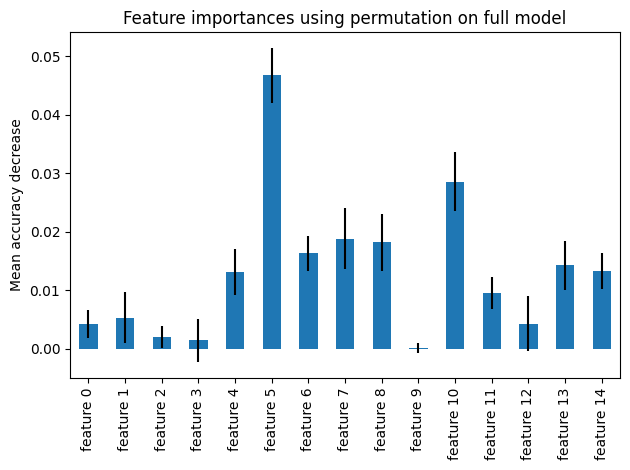

In [47]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [48]:
# Select final features to use - chose 9 out of 14 (64%)
# Did not include others because they were so low and the error bars were large
X_final = spaceship_titanic_final.iloc[:, [4, 5, 6, 7, 8, 10, 11, 13, 14]]
X_final.head(), X_final.shape

(   total_spent  RoomService  FoodCourt  ShoppingMall   Spa  VIP_encoded  \
 0            0            0          0             0     0            0   
 1          736          109          9            25   549            0   
 2        10383           43       3576             0  6715            1   
 3         5176            0       1283           371  3329            0   
 4         1091          303         70           151   565            0   
 
    CryoSleep_encoded  Destination_encoded  Deck_encoded  
 0                  0                    2             1  
 1                  0                    2             5  
 2                  0                    2             0  
 3                  0                    2             0  
 4                  0                    2             5  ,
 (6774, 9))

## 4. Complete classification models

### Redo train test split with final variables

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=8)

In [50]:
# Find the percent who were transported or not
# Even distribution so accuracy is a good metric to use to compare models with
spaceship_titanic_final.iloc[:, 0].value_counts(normalize = True)

Transported_encoded
0    0.504576
1    0.495424
Name: proportion, dtype: float64

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [52]:
log_y_pred = pipe.predict(X_test)
log_y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [53]:
log_y_probabilities = pipe.predict_proba(X_test)
log_y_probabilities

array([[0.86126518, 0.13873482],
       [0.29782639, 0.70217361],
       [0.68572111, 0.31427889],
       ...,
       [0.79800224, 0.20199776],
       [0.82374118, 0.17625882],
       [0.24314681, 0.75685319]])

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pipe.predict(X_test))
print(f"accuracy_score - Accuracy: {accuracy}")

accuracy_score - Accuracy: 0.7860304968027545


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1024
           1       0.78      0.79      0.79      1009

    accuracy                           0.79      2033
   macro avg       0.79      0.79      0.79      2033
weighted avg       0.79      0.79      0.79      2033



- Accuracy: the model made correct predictions 78.6% of the time, which is great.
- Precision: Out of all the people that the model predicted would get transported, 78% actually did.
- Recall: out of all the people that actually did get transported, the model predicted this outcome correctly for 79% of those people.
- F1-score: 0.79, the model does a good job of prediction transportating.

### Decision Tree

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Create a Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameters and their possible ranges for tuning
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(np.arange(10, 31, 10)),
    'min_samples_split': list(np.arange(2, 11)),
    'min_samples_leaf': list(np.arange(1, 5))
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 10, 'criterion': 'entropy'}
Best Accuracy: 0.7738865694735297


In [57]:
dtc_final = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, min_samples_split=4, min_samples_leaf=3)

dtc_final.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3,
                       min_samples_split=4)

In [59]:
# Predicting a new result
dtc_y_pred = dtc_final.predict(X_test)
dtc_y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [60]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, dtc_y_pred)
confusion_mat

array([[760, 264],
       [187, 822]], dtype=int64)

In [61]:
accuracy = accuracy_score(y_test, dtc_y_pred)
print(f"accuracy_score - Accuracy: {accuracy}")

accuracy_score - Accuracy: 0.778160354156419


In [62]:
print(classification_report(y_test, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1024
           1       0.76      0.81      0.78      1009

    accuracy                           0.78      2033
   macro avg       0.78      0.78      0.78      2033
weighted avg       0.78      0.78      0.78      2033



- Accuracy: the model made correct predictions 77.8% of the time, which is great.
- Precision: Out of all the people that the model predicted would get transported, 76% actually did.
- Recall: out of all the people that actually did get transported, the model predicted this outcome correctly for 81% of those people.
- F1-score: 0.78, the model does a good job of prediction transportating.

### Random Forest

In [67]:
# Create a Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Define the hyperparameters and their possible ranges for tuning
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None] + list(np.arange(10, 31, 10)),
    'min_samples_split': list(np.arange(2, 11)),
    'min_samples_leaf': list(np.arange(1, 5))}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini'}
Best Accuracy: 0.7859096628474121


In [68]:
# Create final random forest classifier
rfc_final  = RandomForestClassifier(criterion='gini', max_depth=20, min_samples_split=7, min_samples_leaf=1)

rfc_final.fit(X_train, y_train)

rfc_final_y_pred = rfc_final.predict(X_test)

accuracy = accuracy_score(y_test, rfc_final_y_pred)
print(f"accuracy_score - Accuracy: {accuracy}")

accuracy_score - Accuracy: 0.7958681751106739


In [69]:
print(classification_report(y_test, rfc_final_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1024
           1       0.78      0.82      0.80      1009

    accuracy                           0.80      2033
   macro avg       0.80      0.80      0.80      2033
weighted avg       0.80      0.80      0.80      2033



- Accuracy: the model made correct predictions 79.6% of the time, which is great.
- Precision: Out of all the people that the model predicted would get transported, 78% actually did.
- Recall: out of all the people that actually did get transported, the model predicted this outcome correctly for 82% of those people.
- F1-score: 0.80, the model does a good job of prediction transportating.

## 5. Model Selection

The model I recommend using is the random forest classification model because it had the highest accuracy score of 79.6%. Since the target variable `transported` in the data is balanced (nearly 50%), accuracy is a good score to use. Not to mention precision, recall and f1-score also performed great, compared to logistic regression and decision tree classification.